# Machine Learning Assignment 1

In [1]:
#Importing Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns
from sklearn import linear_model
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2e
from sklearn.metrics import explained_variance_score as evs
import timeit

### Part A: Data Cleaning & Exploratory Analysis

1.Import full data set using Pandas:  Verify that the shape is: (864863, 74)  
2.Limit the dataset to the following columns: [T_degC, Salnty, STheta] and then remove all NaN and NA values (Hint: Pandas has a method for this) .  Verify the shape is: (812174, 3)  
3.Build the following plots using matplotlib:  
a) Scatter: Salnty (salinity of water) vs T_degC  
b) Scatter: STheta (density of water) vs T_degC  
4.Build the following plot using seaborn:  
a) Distribution of T_degC (hint: distplot will be helpful here)  
5.Remove obvious outliers from step 3b:  
 Shape for clean data will be: (812168, 3)  
Hint: Just looking to remove extreme STheta values - please post on Canvas if struggling with this section.   
6.Plot 3b again – does it look better? Explain!  

In [2]:
dataset = pd.read_csv('bottle.csv')
dataset.shape

/Users/bharadwajkacharla/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (47,73) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(864863, 74)

In [3]:
dataset.head()

,Cst_Cnt,Btl_Cnt,Sta_ID,Depth_ID,Depthm,T_degC,Salnty,O2ml_L,STheta,O2Sat,...,R_PHAEO,R_PRES,R_SAMP,DIC1,DIC2,TA1,TA2,pH2,pH1,DIC Quality Comment
0,1,1,054.0 056.0,19-4903CR-HY-060-0930-05400560-0000A-3,0,10.50,33.440,NaN,25.649,NaN,...,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2,054.0 056.0,19-4903CR-HY-060-0930-05400560-0008A-3,8,10.46,33.440,NaN,25.656,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,3,054.0 056.0,19-4903CR-HY-060-0930-05400560-0010A-7,10,10.46,33.437,NaN,25.654,NaN,...,NaN,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,4,054.0 056.0,19-4903CR-HY-060-0930-05400560-0019A-3,19,10.45,33.420,NaN,25.643,NaN,...,NaN,19,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,5,054.0 056.0,19-4903CR-HY-060-0930-05400560-0020A-7,20,10.45,33.421,NaN,25.643,NaN,...,NaN,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
#removing the extra columns

dataset_new = dataset[['T_degC','Salnty','STheta']]
dataset_new.shape

(864863, 3)

In [5]:
print(dataset_new.isnull().sum())

T_degC    10963
Salnty    47354
STheta    52689
dtype: int64


In [6]:
# Removing the null values

dataset_new = dataset_new[dataset_new['T_degC'].notna()]
dataset_new = dataset_new[dataset_new['Salnty'].notna()]
dataset_new = dataset_new[dataset_new['STheta'].notna()]

print(dataset_new.isnull().sum())


T_degC    0
Salnty    0
STheta    0
dtype: int64


In [7]:
dataset_new.head()

,T_degC,Salnty,STheta
0,10.50,33.440,25.649
1,10.46,33.440,25.656
2,10.46,33.437,25.654
3,10.45,33.420,25.643
4,10.45,33.421,25.643


<Figure size 720x504 with 0 Axes>

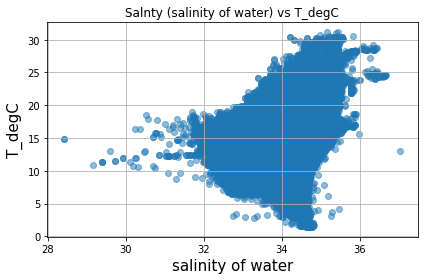

In [8]:
# Building scatter plots using matplotlib
## a) Scatter: Salnty (salinity of water) vs T_degC
plt.figure(figsize=(10, 7))  
fig, ax = plt.subplots()
ax.scatter(dataset_new[['Salnty']], dataset_new[['T_degC']], alpha=0.5)

ax.set_xlabel('salinity of water', fontsize=15)
ax.set_ylabel('T_degC', fontsize=15)
ax.set_title('Salnty (salinity of water) vs T_degC')

ax.grid(True)
fig.tight_layout()

plt.show()

<Figure size 720x504 with 0 Axes>

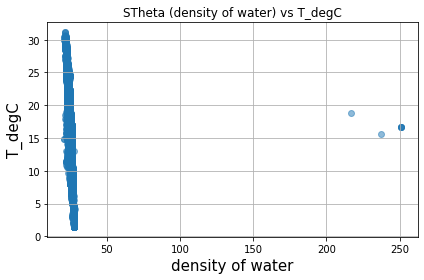

In [9]:
##b) Scatter: STheta (density of water) vs T_degC
plt.figure(figsize=(10, 7))  
fig, ax = plt.subplots()
ax.scatter(dataset_new[['STheta']], dataset_new[['T_degC']], alpha=0.5)

ax.set_xlabel('density of water', fontsize=15)
ax.set_ylabel('T_degC', fontsize=15)
ax.set_title('STheta (density of water) vs T_degC')

ax.grid(True)
fig.tight_layout()

plt.show()

Text(0.5, 1.0, 'Distribution of T_degC')

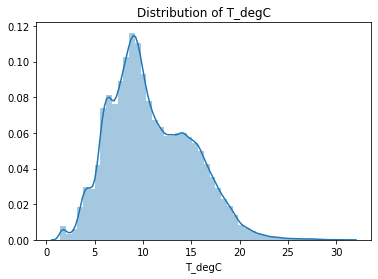

In [10]:
## Distribution of T_degC
sns.distplot(dataset_new[['T_degC']], axlabel='T_degC',label='Distribution of T_degC')
plt.title('Distribution of T_degC')

#### Removing outliers

Based on the scatter plot of 'STheta (density of water) vs T_degC' we can observe that the outliers lie north of 200. Filtering the dataset to exclude the outliers

In [11]:
dataset_new.head()

,T_degC,Salnty,STheta
0,10.50,33.440,25.649
1,10.46,33.440,25.656
2,10.46,33.437,25.654
3,10.45,33.420,25.643
4,10.45,33.421,25.643


In [12]:
dataset_new = dataset_new[dataset_new['STheta'] < 200]
dataset_new.shape

(812168, 3)

<Figure size 720x504 with 0 Axes>

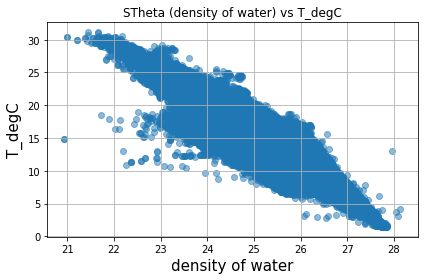

In [13]:
##b) Scatter: STheta (density of water) vs T_degC
plt.figure(figsize=(10, 7))  
fig, ax = plt.subplots()
ax.scatter(dataset_new[['STheta']], dataset_new[['T_degC']], alpha=0.5)

ax.set_xlabel('density of water', fontsize=15)
ax.set_ylabel('T_degC', fontsize=15)
ax.set_title('STheta (density of water) vs T_degC')

ax.grid(True)
fig.tight_layout()

plt.show()

Due to presence of the outliers, the scatter plot of the distribution of density of water vs T_degC was clustered to accomdate the outliers in the graph. Post removal of the outliers we can observe a clear relationship between the temperature and density. Based on the above graph we can infer that the temperature is negatively correlated with the density of the water




### Part B: Train & Test Split:



In [14]:
# Splitting training and testing dataset into train and test
from sklearn.model_selection import train_test_split
X = dataset_new[['STheta','Salnty']]
y = dataset_new [['T_degC']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 10)

In [15]:
y_train.head()

,T_degC
261073,12.52
37131,8.25
597906,17.18
216490,4.58
35947,7.99


### Part C: Linear Regression Using Normal Equation - Coded In Python

##### Build the normal equation using numpy & fit using your training data (X_train & y_train).
- Note: Make sure to include an intercept value of 1 for every observation in your X_train.

##### Print out the coefficients - we will need to compare these to the output in Part 4


In [16]:
X_train_b = np.c_[np.ones((len(X_train), 1)), X_train]  # adding x0 = 1 to each instance
theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)
theta_best

array([[35.75676782],
       [-5.03700806],
       [ 3.10661234]])

##### Predict T_degC for the test data using the fitted values in b.  
- Make sure to include an intercept value of 1 for every observation in your X_test.  
- Call predictions y_pred

In [17]:
X_new_test = np.c_[np.ones((len(X_test), 1)), X_test]  # add x0 = 1 to each instance
y_pred = X_new_test.dot(theta_best)
y_pred

array([[13.42936608],
       [14.28922111],
       [ 8.89972468],
       ...,
       [ 8.88940085],
       [ 5.93573357],
       [ 7.58489808]])

##### Calculate the following for the test data:
- mean squared error  
- r-squared
- explained variance  
Note: https://scikit-learn.org/stable/modules/classes.html#sklearn-metrics-metrics

In [18]:
mean_square_error = mse(y_test, y_pred)
print('Mean square error is', mean_square_error)
rsquared = r2e(y_test, y_pred)
print('r-square error is', rsquared)
explained_variance = evs(y_test, y_pred)
print('Explained variance is', explained_variance)

Mean square error is 0.2338503047836382
r-square error is 0.9869021736580293
Explained variance is 0.9869022308633512


##### Create a scatterplot that shows actual versus predicted values for the T_degC.


<Figure size 720x504 with 0 Axes>

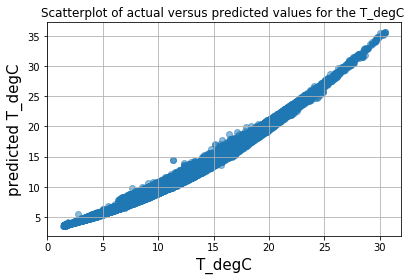

In [19]:
plt.figure(figsize=(10, 7))  
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred, alpha=0.5)

ax.set_xlabel('T_degC', fontsize=15)
ax.set_ylabel('predicted T_degC', fontsize=15)
ax.set_title('Scatterplot of actual versus predicted values for the T_degC ')

ax.grid(True)
fig.tight_layout()

plt.show()

### Part D: Using sklearn API



##### Create an instance of the LinearRegression class called "lin_reg". Fit lin_reg using X_train & y_train.
- Note: sklearn will automatically add the intercept term, so you do not need to do this here. 

#### Print out the coefficients (including the intercept)
- Note: These should be EXACTLY the same as what you found in Part C step 2


In [20]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(X_train,y_train)
print("Coefficient of the model are ",lin_reg.intercept_,lin_reg.coef_)

Coefficient of the model are  [35.75676782] [[-5.03700806  3.10661234]]


##### Predict T_degC for the test data using the fitted values in b.
- Call predictions y_pred_sklearn

In [21]:
y_pred_sklearn = lin_reg.predict(X_test)
y_pred_sklearn

array([[13.42936608],
       [14.28922111],
       [ 8.89972468],
       ...,
       [ 8.88940085],
       [ 5.93573357],
       [ 7.58489808]])

##### Calculate the following for the test data:
- mean squared error  
- r-squared
- explained variance  


In [22]:
mean_square_error = mse(y_test, y_pred_sklearn)#mean_squared_error.sum
print('Mean square error is', mean_square_error)
rsquared = r2e(y_test, y_pred_sklearn)
print('r-square error is', rsquared)
explained_variance = evs(y_test, y_pred_sklearn)
print('Explained variance is', explained_variance)


Mean square error is 0.23385030478373467
r-square error is 0.9869021736580239
Explained variance is 0.9869022308633469


##### Create a scatterplot that shows actual versus predicted values for the T_degC.


<Figure size 720x504 with 0 Axes>

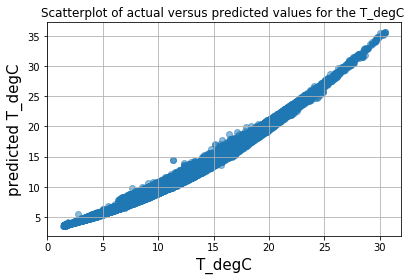

In [23]:
plt.figure(figsize=(10, 7))  
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred_sklearn, alpha=0.5)

ax.set_xlabel('T_degC', fontsize=15)
ax.set_ylabel('predicted T_degC', fontsize=15)
ax.set_title('Scatterplot of actual versus predicted values for the T_degC ')

ax.grid(True)
fig.tight_layout()

plt.show()

### Part E: Conceptual Questions



##### Why is it important to have a test set?

       The evaluation of a model skill on the training dataset would result in a biased score. Therefore the model is evaluated on the held-out sample to give an unbiased estimate of model skill. Hence, it's important to have a test set. Also, a test dataset is a dataset that is independent of the training dataset, however, it follows the same probability distribution as the training dataset. If a model fit to the training dataset also fits the test dataset well, minimal overfitting has taken place. A better fitting of the training dataset as opposed to the test dataset usually points to overfitting. 
       To summarize,  the test data provides an unbiased evaluation of a final model fit on the training dataset.

##### If the normal equation always provides a solution, when would we not want to use it?


    The main reason we don't use normal equation to solve for the solution is due to computational complexity; it's computationally cheaper to find solutions in some cases.

    The normal equation formula looks very simple, also it works perfectly well for a univariate case i.e., in cases with one variable. In the multivariate case, when they are many variables, the computations required to solve for the solution is slightly more complicated.  
                                       
                                       𝛽=(𝑋′𝑋)−𝑋′𝑌
                                       
    The below is the representation of the time difference between the normal equation solution and the sklearn solution.
                                       

In [40]:
#normal equation implementation
X_train_b = np.c_[np.ones((len(X_train), 1)), X_train]  # adding x0 = 1 to each instance
X_new_test = np.c_[np.ones((len(X_test), 1)), X_test]  # add x0 = 1 to each instance

start = timeit.default_timer()
theta_best = np.linalg.inv(X_train_b.T.dot(X_train_b)).dot(X_train_b.T).dot(y_train)
y_pred = X_new_test.dot(theta_best)
stop = timeit.default_timer()
print(stop - start)

0.046257012000005204


In [31]:
#sklearn implementation
lin_reg = linear_model.LinearRegression()

start = timeit.default_timer()
lin_reg.fit(X_train,y_train)
y_pred_sklearn = lin_reg.predict(X_test)

stop = timeit.default_timer()
print(stop - start)

0.028926221999995505


    As the variables increase the computations increase and solving the normal equation way would be less efficient when compared to regression or gradient descent methods.

##### How might we improve the fit of our models from Part C & D?
Note: There are lots of possible answers to this section - just describe one in detail. 

    There are multiple methods of improving the fit of a model. Following are the ways of improving the fit of a model:
        - Sourcing additional data
        - Treat missing and outlier data
        - Feature Engineering
        - Feature Selection

    Feature Engineering - Feature engineering helps us to extract additional underlying information from the data. The new information is extracted in terms of new features. The newly extracted features may have a higher ability to explain the variance in the training data and thereby improving model accuracy.

    Hypothesis geneartion is the basis of the feature engineering, the new features are highly influenced by the hypothsesis. Good hypothesis results in good features.

    One of the important aspects of feature engineering is feature transformation.

    Feature transformation: There are various scenarios where feature transformation is required:
    -  Changing the scale of a variable from original scale to scale between zero and one. This is known as data normalization. In our case, the Salinty and Denisty parameters used for predicting the temperature are recorded in different scales. In such cases, normalization of the data may result in better predictions.



##### As we move further into Machine Learning, we will need to continually consider the bias-variance tradeoff. Explain what bias is and what variance is in regards to the bias-variance tradeoff. 

    The prediction error in any machine learning algorithm can be broken down into three parts:
    - Bias error
    - Variance error
    - Irreducible error
    
###### Bias error:
    The bias error is defined as the average difference between the expected prediction of the model and the predicted values. Models with high bias have less assumptions about the data and oversimplifies the model. The models with high bias leads to high error on training and test data set.
###### Varience error:
    The error due to variance is defined as the variability of a model prediction for a given data point. Models with high variance error have been strongly influenced by the training data. As a result, the models performs well on training data but has high error on test data set.
###### Bias-Varience tradeoff:
    If the model is too simple and has few parameters then the model may have high bias and low variance. On the other hand if the model has large number of parameters then it's going to result in high variance and low bias. So, it's important to find a right balance without overfitting or underfitting the model.
    To build a optimum model, we need to find balance between bias and variance such that it minimizes the total error

##### In a linear regression model, how might we reduce bias?

    To reduce reduce we can add more features or perform feature engineering and add additional factors to the data. This can help the model generalize the data well. Also, increasing the degree of polynomial in the hypothesis function can also help in reducing bias.

###### In a linear regression model, how might we reduce variance? 


    Variance can be reduced by decreasing the number of features in the model. There are numberous ways of checking the importance of the features and accordingly restricting the model to important features.Increasing the size of the training set will also help in reducing the variance.